## Bike Sharing Price Prediction Model

This project uses historical bike share data to build a **Machine Learning model** that predicts demand.

### Dataset Overview
- **Source**: `train.csv`
- **Features Used**: 
  - `datetime`
  - Weather-related features
  - Holiday indicators

### Models
- **Linear Regression**:
  - A simple regression model used as a baseline.
- **Random Forest Regression**:
  - A tree-based ensemble model that handles non-linear relationships and interactions between features effectively.
  - Provides feature importance to understand which features contribute the most to predictions.

### Libraries Used
- `numpy`
- `pandas`
- `scikit-learn`
- `joblib`
- `matplotlib`
- `seaborn`

### Metrics
- **Linear Regression**:
  - Mean Squared Error: `8.337386005356284e-26`
  - R² Score: `1.0`
- **Random Forest Regression**:
  - Mean Squared Error: *9.895918549127643*
  - R² Score: *0.999700186694409*

### Insights
- Random Forest Regression outperforms Linear Regression in capturing non-linear relationships in the data.
- Feature importance analysis highlights the most influential features for predicting bike demand.


In [7]:
import pandas as pd

# Example DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03']}
df = pd.DataFrame(data)

# Convert to datetime
df['date'] = pd.to_datetime(df['date'])
print(df)

        date
0 2023-01-01
1 2023-01-02
2 2023-01-03


In [8]:
import pandas as pd

# Read the train.csv file
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(train_data.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [10]:
print(train_data.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [11]:
# Replace 'column_name' with an actual column name from train_data
print(train_data['season'].head())

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64


In [12]:
print(train_data.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


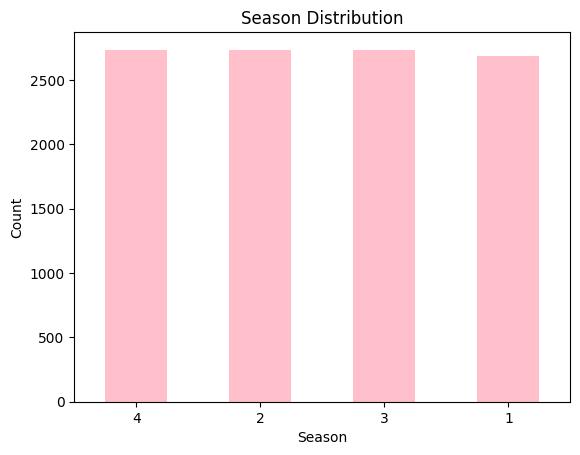

In [13]:
import matplotlib.pyplot as plt

# Bar plot for the 'season' column
train_data['season'].value_counts().plot(kind='bar', color='pink')
plt.title("Season Distribution")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()

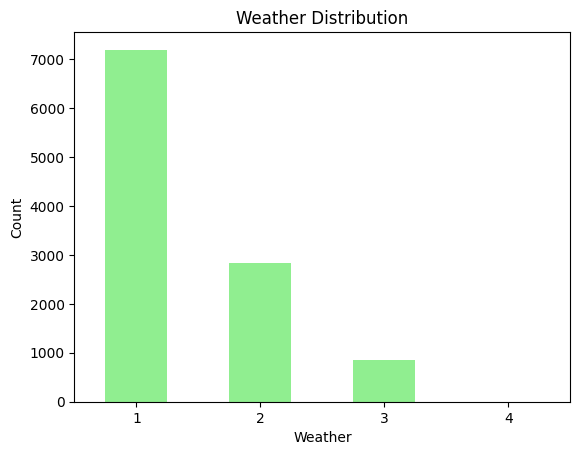

In [14]:
train_data['weather'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Weather Distribution")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()

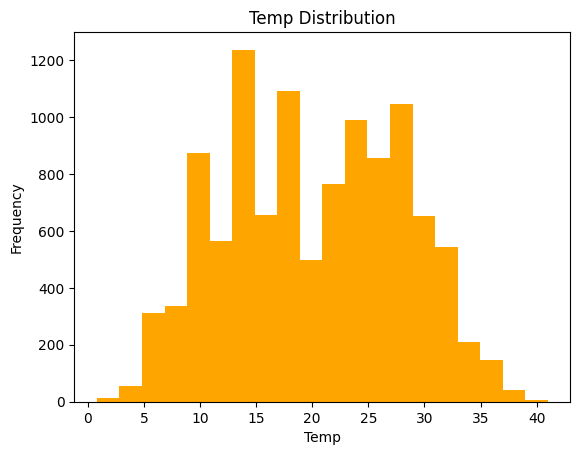

In [15]:
train_data['temp'].plot(kind='hist', bins=20, color='orange')
plt.title("Temp Distribution")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.show()

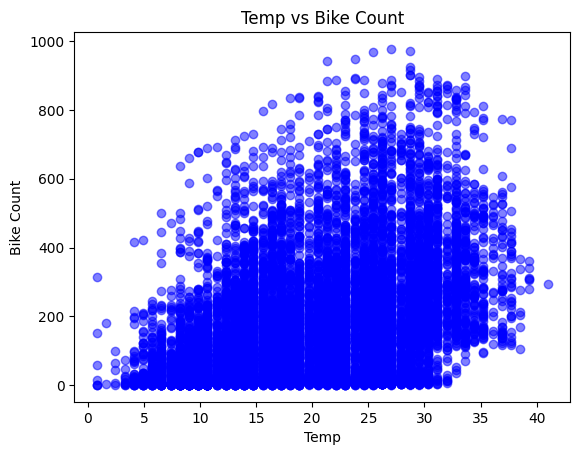

In [16]:
plt.scatter(train_data['temp'], train_data['count'], color='blue', alpha=0.5)
plt.title("Temp vs Bike Count")
plt.xlabel("Temp")
plt.ylabel("Bike Count")
plt.show()

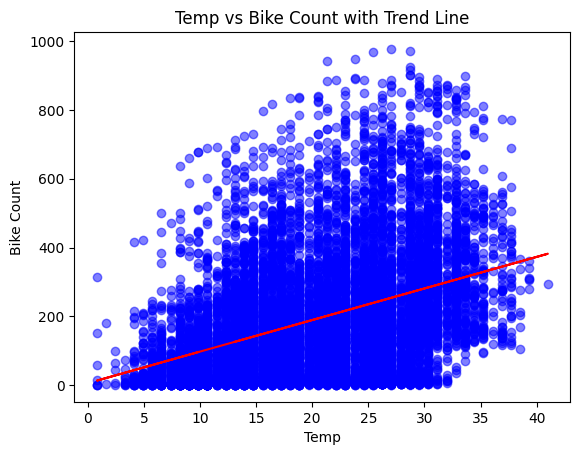

In [17]:
import numpy as np

# Fit a linear regression line
z = np.polyfit(train_data['temp'], train_data['count'], 1)
p = np.poly1d(z)

# Plot scatter and trend line
plt.scatter(train_data['temp'], train_data['count'], color='blue', alpha=0.5)
plt.plot(train_data['temp'], p(train_data['temp']), color='red')  # Trend line
plt.title("Temp vs Bike Count with Trend Line")
plt.xlabel("Temp")
plt.ylabel("Bike Count")
plt.show()

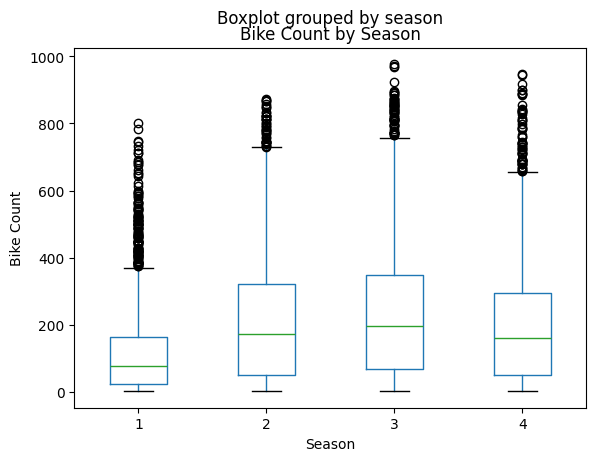

In [18]:
train_data.boxplot(column='count', by='season', grid=False)
plt.title("Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Bike Count")
plt.show()

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

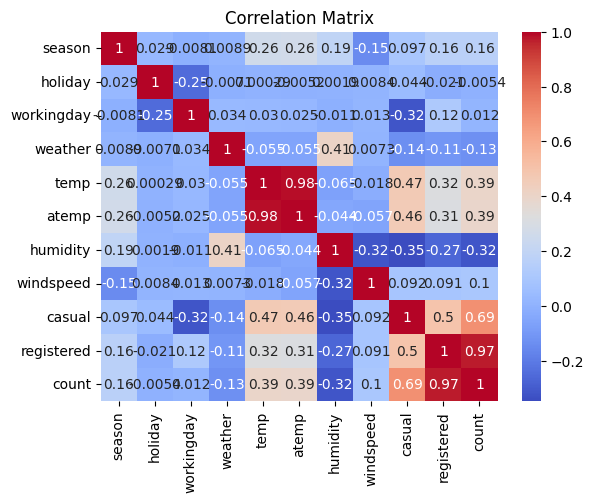

In [19]:
# Select only numeric columns for correlation calculation
numeric_columns = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

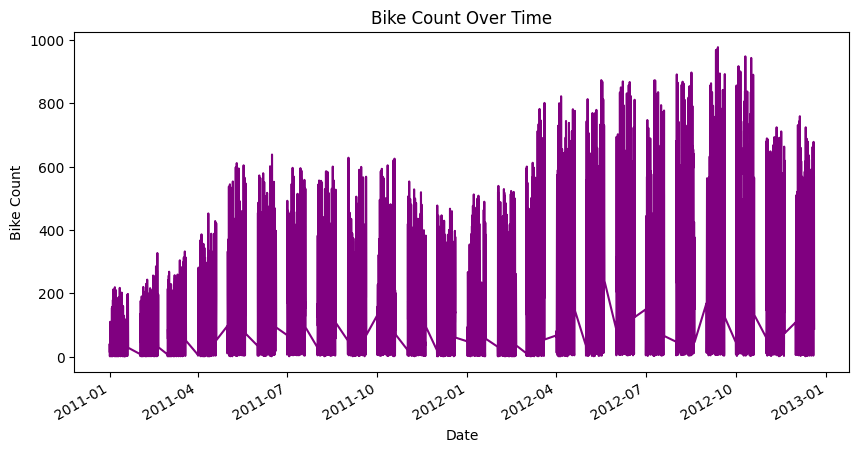

In [20]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data.set_index('datetime', inplace=True)

# Plot bike count over time
train_data['count'].plot(figsize=(10, 5), color='purple')
plt.title("Bike Count Over Time")
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.show()

In [21]:
# Extract hour, month, and day_of_week from the index (datetime)
train_data['hour'] = train_data.index.hour
train_data['month'] = train_data.index.month
train_data['day_of_week'] = train_data.index.dayofweek
print(train_data.head())

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  hour  \
datetime                                                                    
2011-01-01 00:00:00        81        0.0       3          13     16     0   
2011-01-01 01:00:00        80        0.0       8          32     40     1   
2011-01-01 02:00:00        80        0.0       5          27     32     2   
2011-01-01 03:00:00        75        0.0       3          10     13     3   
2011-01-01 0

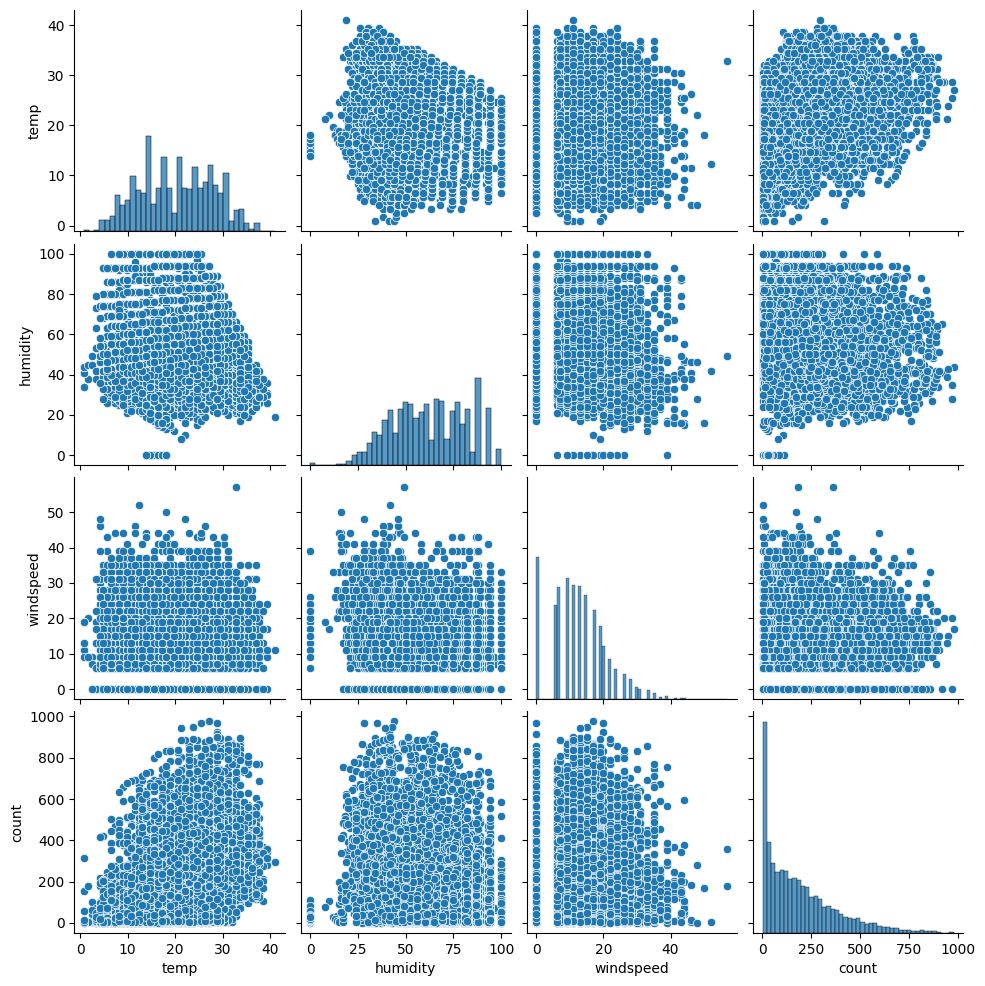

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data[['temp', 'humidity', 'windspeed', 'count']])
plt.show()

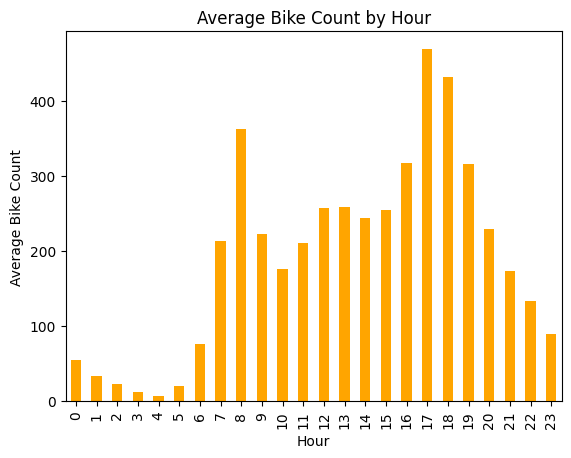

In [23]:
hourly_data = train_data.groupby('hour')['count'].mean()
hourly_data.plot(kind='bar', color='orange')
plt.title("Average Bike Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Bike Count")
plt.show()

In [24]:
# Ensure that the cell defining 'train_data' (CELL INDEX: 2) is executed before running this cell
train_data.fillna(train_data.mean(), inplace=True)

In [25]:
train_data = pd.get_dummies(train_data, columns=['season', 'weather'], drop_first=True)

In [26]:
train_data.to_csv('processed_train.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = train_data.drop(columns=['count'])  # Drop the target column
y = train_data['count']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 8.337386005356284e-26
R2 Score: 1.0


In [31]:
import joblib
joblib.dump(model, 'bike_share_model.pkl')

['bike_share_model.pkl']

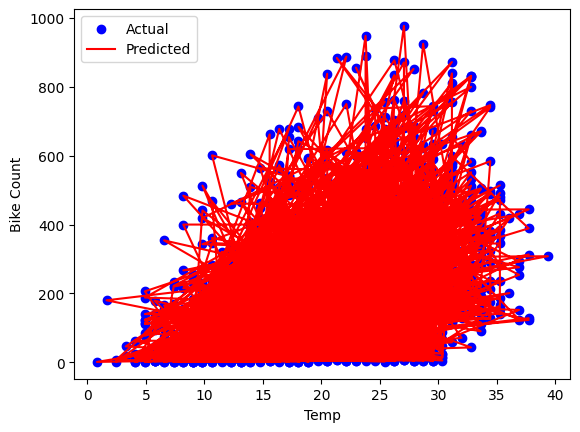

In [32]:
# Select a single feature (e.g., 'temp') from X_test for plotting
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual')

# Plot the predicted values against the same feature
plt.plot(X_test['temp'], y_pred, color='red', label='Predicted')

plt.xlabel('Temp')
plt.ylabel('Bike Count')
plt.legend()
plt.show()


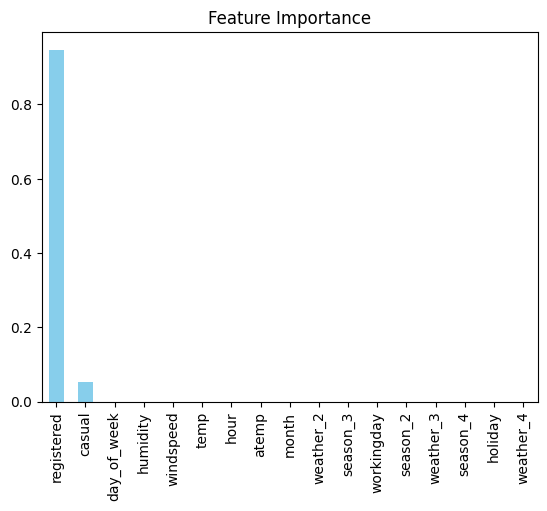

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Ensure CELL INDEX: 21 is executed before running this cell
if 'X_train' not in locals() or 'y_train' not in locals():
	raise NameError("Ensure CELL INDEX: 21 is executed to define 'X_train' and 'y_train'.")

model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.show()

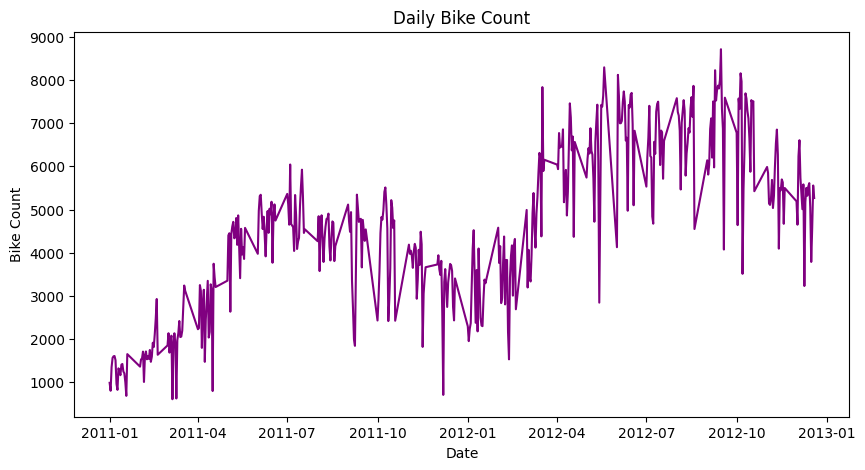

In [35]:
daily_data = train_data.groupby(train_data.index.date)['count'].sum()
daily_data.plot(figsize=(10, 5), color='purple')
plt.title("Daily Bike Count")
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.show()

In [36]:
import joblib
joblib.dump(model, 'bike_share_model.pkl')

['bike_share_model.pkl']

In [39]:
train_data.to_csv('processed_train.csv', index=False)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 9.895918549127643
R² Score: 0.999700186694409


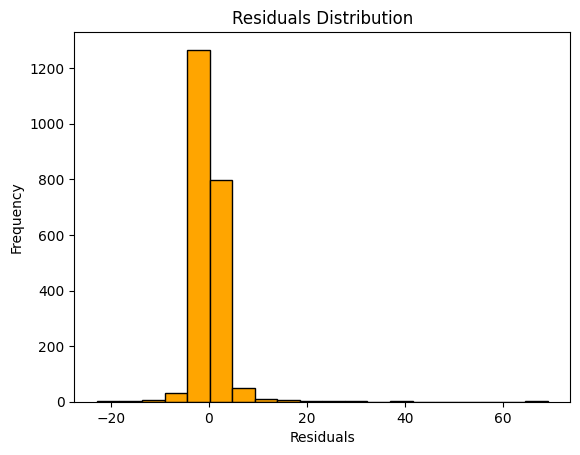

['random_forest_model.pkl']

In [44]:
import joblib

residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

joblib.dump(model, 'random_forest_model.pkl')

In [45]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']